<a href="https://www.kaggle.com/code/trishasengupta27/youtube-data-analysis?scriptVersionId=189186709" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/youtube-trending-video-dataset/MX_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/GB_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/BR_category_id.json
/kaggle/input/youtube-trending-video-dataset/FR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/MX_category_id.json
/kaggle/input/youtube-trending-video-dataset/GB_category_id.json
/kaggle/input/youtube-trending-video-dataset/US_category_id.json
/kaggle/input/youtube-trending-video-dataset/BR_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/IN_category_id.json
/kaggle/input/youtube-trending-video-dataset/KR_category_id.json
/kaggle/input/youtube-trending-video-dataset/DE_youtube_trending_data.csv
/kaggle/input/youtube-trending-video-dataset/RU_category_id.json
/kaggle/input/youtube-trend

# IMPORT THE LIBRABIES

In [2]:
import numpy as np
import pandas as pd
import json
import datetime

import re
import nltk
from nltk.corpus import stopwords

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [4]:
 df = pd.read_csv("../input/youtube-trending-video-dataset/IN_youtube_trending_data.csv")
 df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


In [5]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

# Extract date and time into separate columns
df['date'] = df['publishedAt'].dt.date
df['time'] = df['publishedAt'].dt.time

In [6]:
df['date']

0         2020-08-12
1         2020-08-11
2         2020-08-11
3         2020-08-10
4         2020-08-11
             ...    
251272    2024-04-09
251273    2024-04-12
251274    2024-04-12
251275    2024-04-11
251276    2024-04-12
Name: date, Length: 251277, dtype: object

In [7]:
df['time']

0         04:31:41
1         09:00:11
2         07:30:02
3         05:30:49
4         05:30:13
            ...   
251272    02:30:22
251273    11:31:50
251274    07:11:00
251275    14:45:01
251276    17:27:51
Name: time, Length: 251277, dtype: object

The different csv files descibe the yputube-trending videos in different countries , IN - is india

In [8]:
df1=pd.read_csv("../input/youtube-trending-video-dataset/US_youtube_trending_data.csv")

**We will be needing more info about the dataset , hence we will access the  .json files  which give us info aabt the categoryID

In [9]:
with open("../input/youtube-trending-video-dataset/IN_category_id.json") as f: categoryID = json.load(f)
categoryID, l_c = categoryID['items'], len(categoryID['items'])
ID_to_Category = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          [categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [10]:
ID_to_Category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [11]:
with open("../input/youtube-trending-video-dataset/IN_category_id.json") as f: categoryID = json.load(f)
categoryID, l_c = categoryID['items'], len(categoryID['items'])
ID_to_CategoryUS = dict(zip([int(categoryID[i]['id']) for i in range(l_c)],
                          [categoryID[i]['snippet']['title'] for i in range(l_c)]))

In [12]:
ID_to_CategoryUS

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

# 

**TAGS**
We can analyse our data on the basics of tags and on factors whether adding tags to the videos impact the number of views 

In [13]:
def clean_tags(tag):
    if isinstance(tag, list):
        tag = ' '.join(tag)  # Join list elements into a single string
    if tag == '[none]':
        return []
    return tag.lower().replace('"', '').split('|')

In [14]:
df['tags'] = df['tags'].apply(clean_tags)
df['tags']

0         [sadak, sadak 2, mahesh bhatt, vishesh films, ...
1                                                  [[none]]
2         [clash diljit dosanjh, diljit dosanjh, diljit ...
3         [hindi songs, 2020 hindi songs, 2020 new songs...
4         [vyrl original, mohsin khan, shivangi joshi, p...
                                ...                        
251272    [tips telugu, hanuman chalisa, hanuman telugu ...
251273    [army admit card, army admit card 2024, indian...
251274         [comicverse, comic verse, comicverse marvel]
251275    [daily vlogs, comedy vlogs, lifestyle vlogs, d...
251276    [hero isl, indian super league, indian footbal...
Name: tags, Length: 251277, dtype: object

In [15]:
def clean_titles(title):
    tokens = title.lower().split()
    cleaned = []
    sw = set(stopwords.words('english'))
    for token in tokens:
        if token.startswith('$') or token.isnumeric() or not token.isalnum() or token in sw:  # Remove money amount, non-alphanumeric tokens, or stopwords
            continue
        else:
            cleaned.append(token)
    return ' '.join(cleaned)

df['title_cl'] = df['title'].apply(clean_titles)


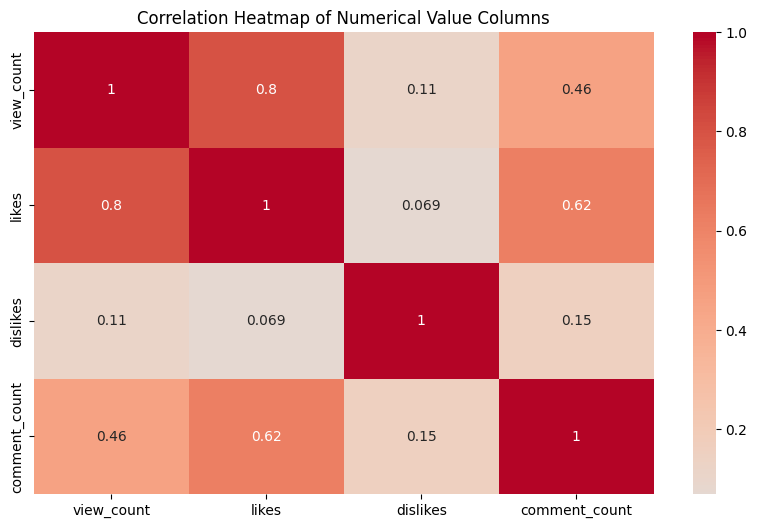

In [16]:
numerical_columns = ['view_count', 'likes', 'dislikes', 'comment_count']

# Calculate correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Value Columns')
plt.show()

...

In [17]:
from collections import Counter
cnt = Counter()

# Finding the occurence of words in video titles
for title in df['title_cl']:
    for token in title.split():
        cnt[token] += 1

# Finding the 50 most used words in video titles
dist = cnt.most_common(50)
top_words = []
freqs = []
for word, freq in dist:
    top_words.append(word)
    freqs.append(freq)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


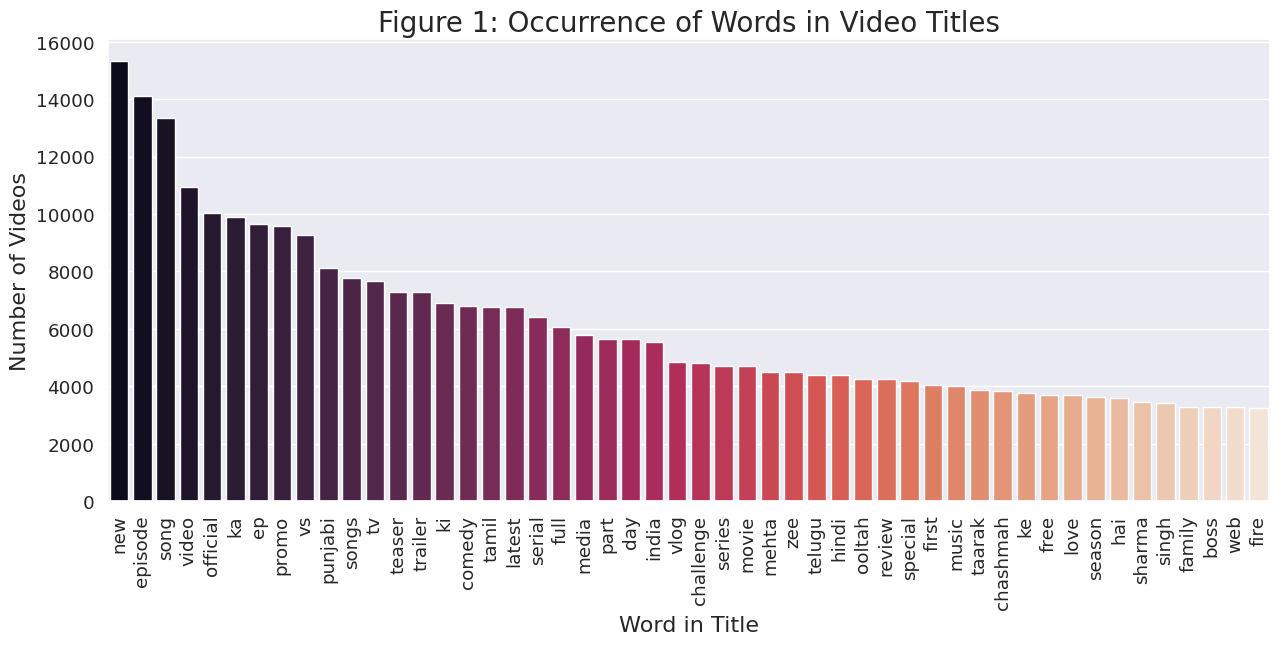

In [18]:
# Graphing number of times the world occure in title
fig= plt.figure(figsize=(15,6))
sns.set_style("darkgrid")
sns.set(font_scale=1.2)

sns.barplot(x=top_words,y=freqs, palette="rocket")

plt.xticks(rotation=90)
plt.xlabel('Word in Title', fontsize=16)
plt.ylabel('Number of Videos', fontsize=16)
plt.title('Figure 1: Occurrence of Words in Video Titles', fontsize=20)
plt.show()

In [19]:
df['categoryId'].unique().sum()
 

288

In [20]:
df['categoryId']

0         24
1         10
2         10
3         10
4         10
          ..
251272    10
251273    27
251274    24
251275    24
251276    17
Name: categoryId, Length: 251277, dtype: int64

In [21]:
max_views_per_category = df.groupby('categoryId')['view_count'].max()
max_views_per_category

categoryId
1      78319334
2      48123437
10    264407389
15     92597901
17     61608036
19     40533294
20    145135679
22    141191928
23     84994444
24    156704924
25     91180111
26     65891951
27    155975017
28     78370297
29      5292130
Name: view_count, dtype: int64

In [22]:
category_mapping = {
    1: 'Film & Animation', 2: 'Autos & Vehicles', 10: 'Music', 15: 'Pets & Animals', 17: 'Sports',
    18: 'Short Movies', 19: 'Travel & Events', 20: 'Gaming', 21: 'Videoblogging', 22: 'People & Blogs',
    23: 'Comedy', 24: 'Entertainment', 25: 'News & Politics', 26: 'Howto & Style', 27: 'Education',
    28: 'Science & Technology', 30: 'Movies', 31: 'Anime/Animation', 32: 'Action/Adventure', 33: 'Classics',
    34: 'Comedy', 35: 'Documentary', 36: 'Drama', 37: 'Family', 38: 'Foreign', 39: 'Horror',
    40: 'Sci-Fi/Fantasy', 41: 'Thriller', 42: 'Shorts', 43: 'Shows', 44: 'Trailers'
}


In [23]:

category_freq = df['categoryId'].value_counts()
# Plotting
max_views_per_category = df.groupby('categoryId')['view_count'].max().reset_index()

# Merge the original DataFrame with the max_views_per_category to get video details
most_watched_videos_per_category = pd.merge(max_views_per_category, df, on=['categoryId', 'view_count'])

# Map categoryId to category names
most_watched_videos_per_category['category_name'] = most_watched_videos_per_category['categoryId'].map(category_mapping)

In [24]:
category_freq

categoryId
24    98264
22    41079
10    32609
23    18155
20    14735
26     8065
28     7566
25     7543
17     7306
1      6491
27     5955
19     1712
2      1597
15      110
29       90
Name: count, dtype: int64

In [25]:
max_views_per_category

,categoryId,view_count
0,1,78319334
1,2,48123437
2,10,264407389
3,15,92597901
4,17,61608036
5,19,40533294
6,20,145135679
7,22,141191928
8,23,84994444
9,24,156704924


In [26]:
max_views_per_category.max()

categoryId           29
view_count    264407389
dtype: int64

In [27]:

# Map categoryId to category names and add as a new column
max_views_per_category['category_name'] = max_views_per_category['categoryId'].map(category_mapping).fillna('Unknown Category')

# Sorting by view count for better visualization
max_views_per_category = max_views_per_category.sort_values(by='view_count', ascending=False)

# Display the DataFrame
print(max_views_per_category)

    categoryId  view_count         category_name
2           10   264407389                 Music
9           24   156704924         Entertainment
12          27   155975017             Education
6           20   145135679                Gaming
7           22   141191928        People & Blogs
3           15    92597901        Pets & Animals
10          25    91180111       News & Politics
8           23    84994444                Comedy
13          28    78370297  Science & Technology
0            1    78319334      Film & Animation
11          26    65891951         Howto & Style
4           17    61608036                Sports
1            2    48123437      Autos & Vehicles
5           19    40533294       Travel & Events
14          29     5292130      Unknown Category


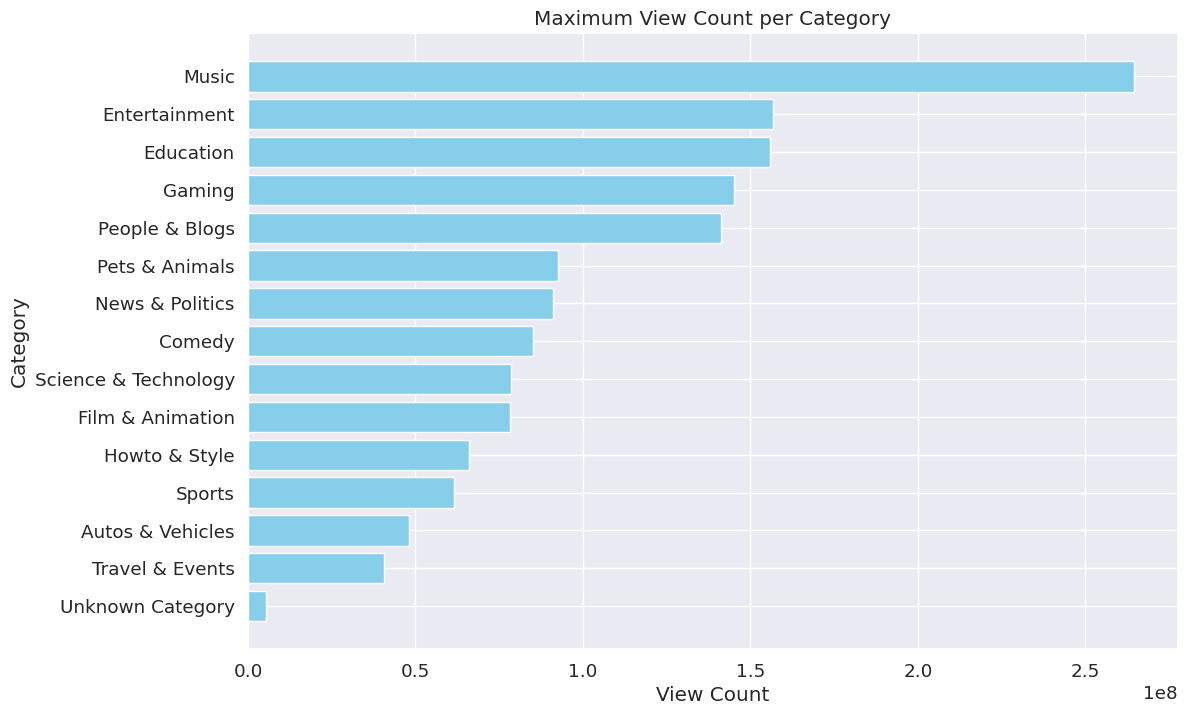

In [28]:

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(max_views_per_category['category_name'], max_views_per_category['view_count'], color='skyblue')
plt.xlabel('View Count')
plt.ylabel('Category')
plt.title('Maximum View Count per Category')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest bar at the top
plt.show()

Channel Frequencies

Now lets see which chanels have a large number of trending videos. Based on our previous catagory analysis, we can assume that the channels with the most number of trending videos will be Entertainment, Gaming, Music and Sports chanel. We can start by calculating the trending video frequency for each channel.

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2349 (\N{DEVANAGARI LETTER BHA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2366 (\N{DEVANAGARI VOWEL SIGN AA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2352 (\N{DEVANAGARI LETTER RA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 2340 (\N{DEVANAGARI LETTER TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


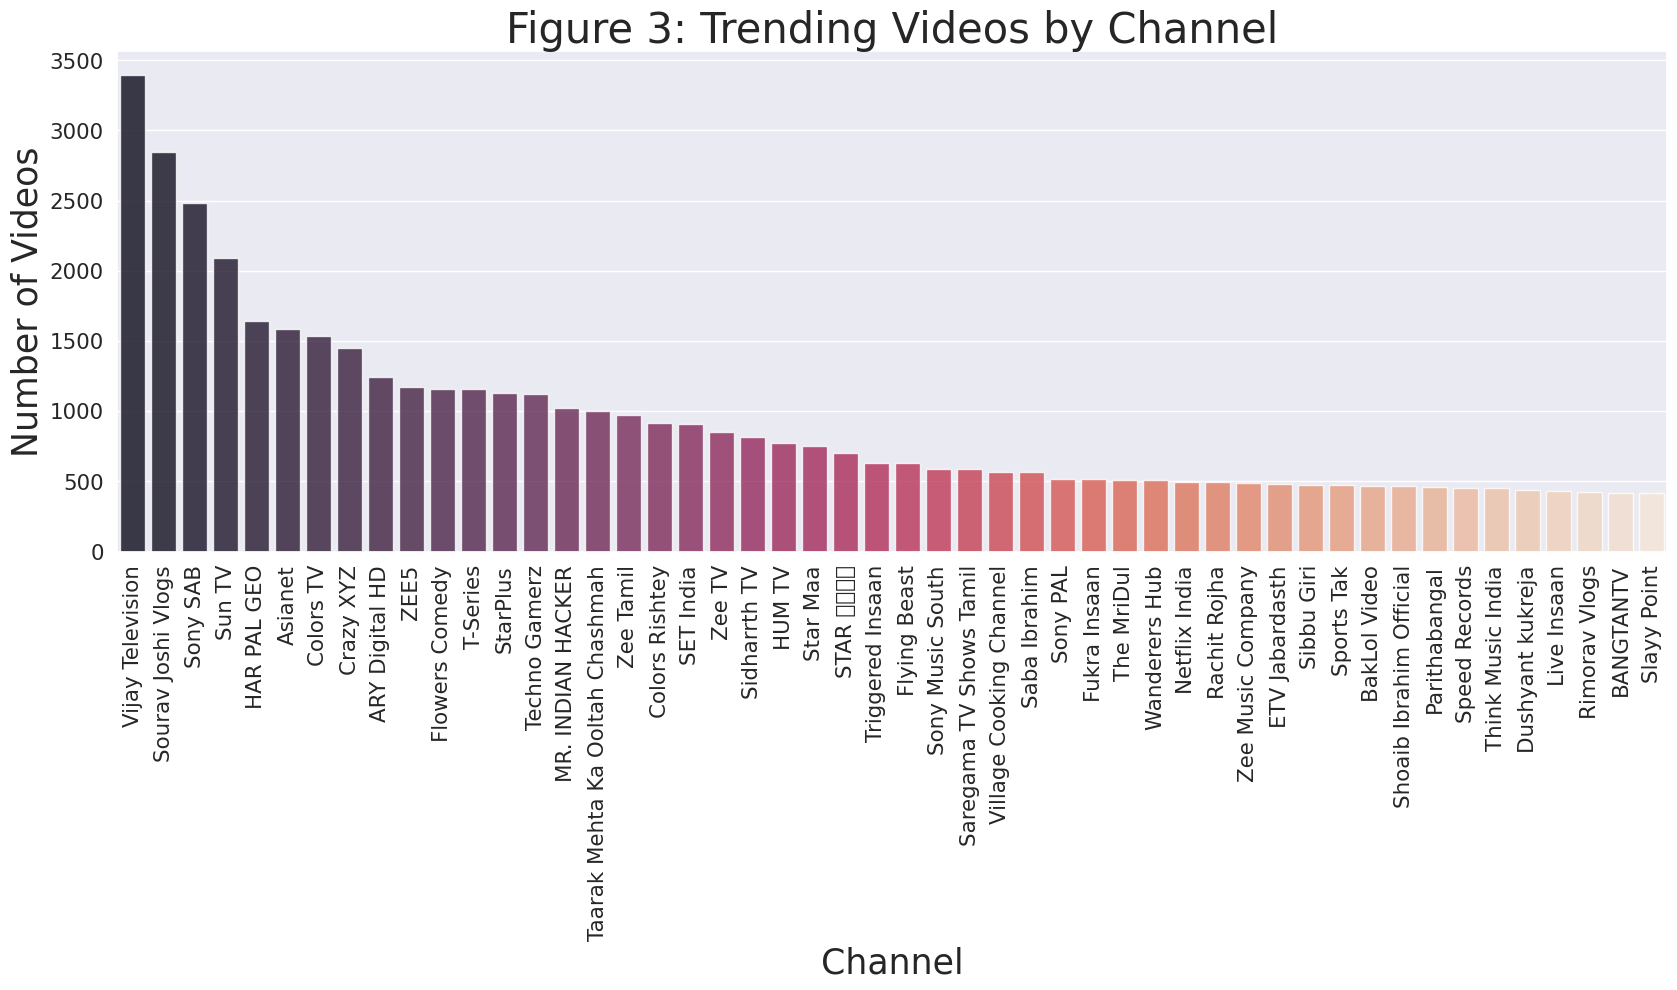

In [29]:
sns.set_style("darkgrid")
sns.set(font_scale=1.4)

channel_freq = df['channelTitle'].value_counts()
channel_freq = channel_freq[0:50]

# Bar graph for number of videos for the top 50 channels
plt.figure(figsize=(20, 6.5))
sns.barplot(x=channel_freq.index, y=channel_freq.values, alpha=0.8, palette="rocket")

plt.xticks(rotation=90)
plt.xlabel('Channel', fontsize=25)
plt.ylabel('Number of Videos', fontsize=25)
plt.title('Figure 3: Trending Videos by Channel', fontsize=30)
plt.show()

In [30]:
channel_freq.unique()

array([3396, 2845, 2480, 2088, 1640, 1584, 1532, 1447, 1246, 1174, 1157,
       1156, 1130, 1123, 1019, 1000,  975,  915,  911,  853,  818,  771,
        754,  705,  633,  631,  588,  585,  568,  567,  517,  513,  510,
        506,  498,  493,  486,  483,  474,  472,  468,  465,  463,  455,
        451,  435,  434,  426,  420,  417])

In [31]:
channel_freq[0:10]

channelTitle
Vijay Television      3396
Sourav Joshi Vlogs    2845
Sony SAB              2480
Sun TV                2088
HAR PAL GEO           1640
Asianet               1584
Colors TV             1532
Crazy XYZ             1447
ARY Digital HD        1246
ZEE5                  1174
Name: count, dtype: int64

Text(0.5, 1.0, 'Figure 5: Frequency of Channels with Trending Videos')

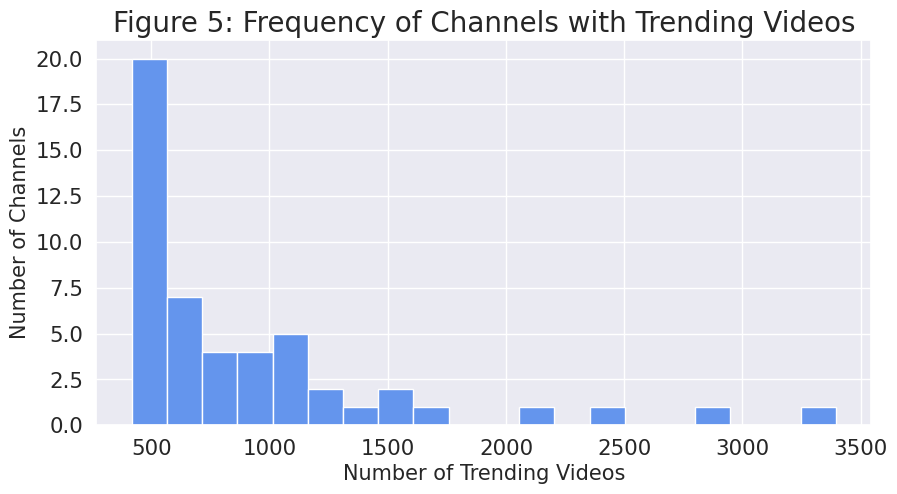

In [32]:
# Histogram for channel frequencies
plt.figure(figsize=(10,5))
channel_freq.hist(bins=20, color="cornflowerblue")
plt.xlabel("Number of Trending Videos", fontsize=15)
plt.ylabel("Number of Channels", fontsize=15)
plt.title('Figure 5: Frequency of Channels with Trending Videos', fontsize=20)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


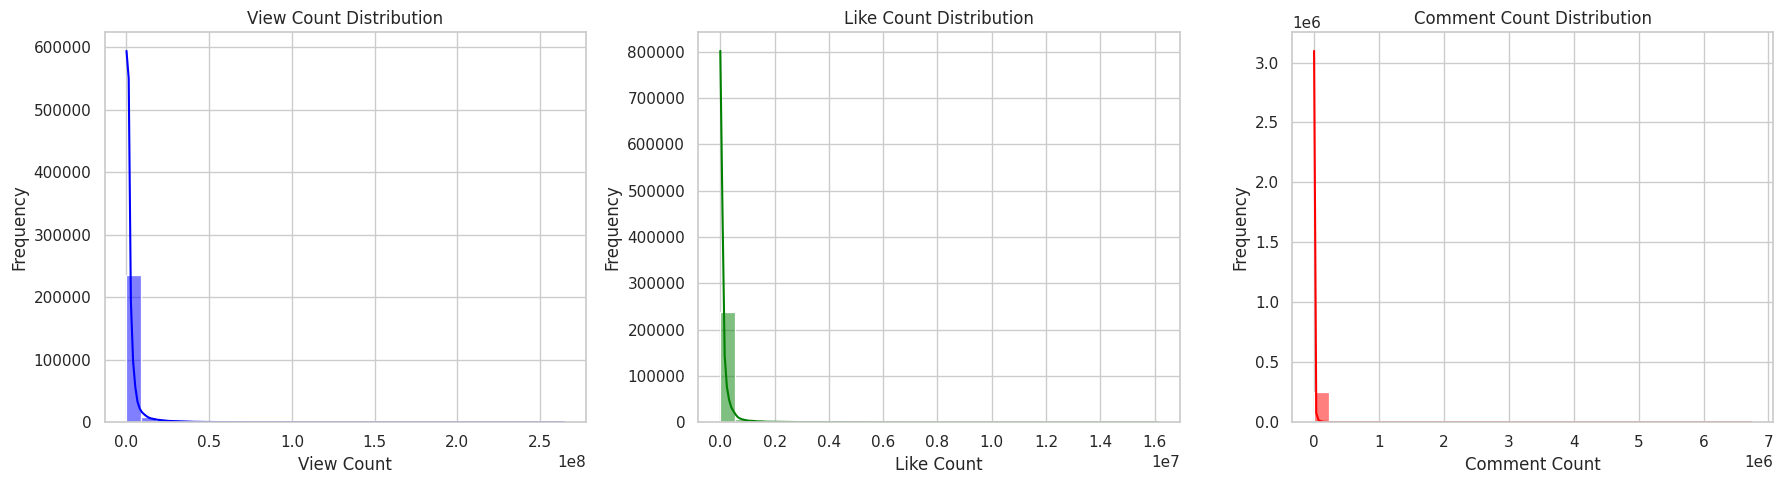

In [33]:
import seaborn as sns
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# view count distribution
sns.histplot(df['view_count'], bins=30, kde=True, ax=axes[0], color='blue')
axes[0].set_title('View Count Distribution')
axes[0].set_xlabel('View Count')
axes[0].set_ylabel('Frequency')
# like count distribution
sns.histplot(df['likes'], bins=30, kde=True, ax=axes[1], color='green')
axes[1].set_title('Like Count Distribution')
axes[1].set_xlabel('Like Count')
axes[1].set_ylabel('Frequency')

# comment count distribution
sns.histplot(df['comment_count'], bins=30, kde=True, ax=axes[2], color='red')
axes[2].set_title('Comment Count Distribution')
axes[2].set_xlabel('Comment Count')
axes[2].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

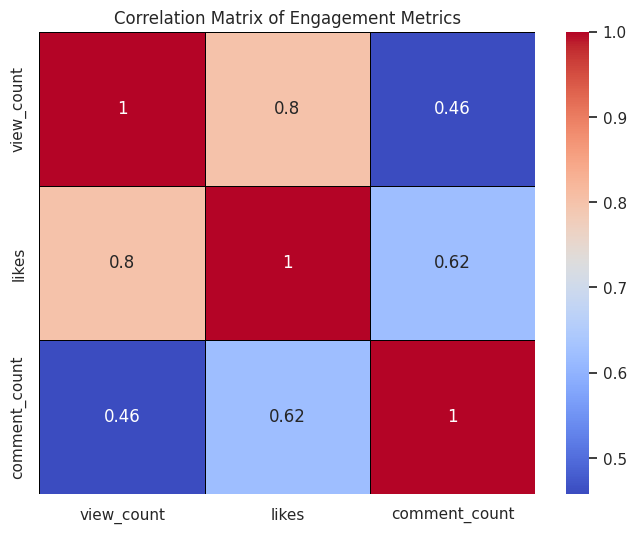

In [34]:
# correlation matrix
correlation_matrix = df[['view_count', 'likes', 'comment_count']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix of Engagement Metrics')
plt.show()

view_count , likes and comment_count are used to look at the average engagment metrics by category 

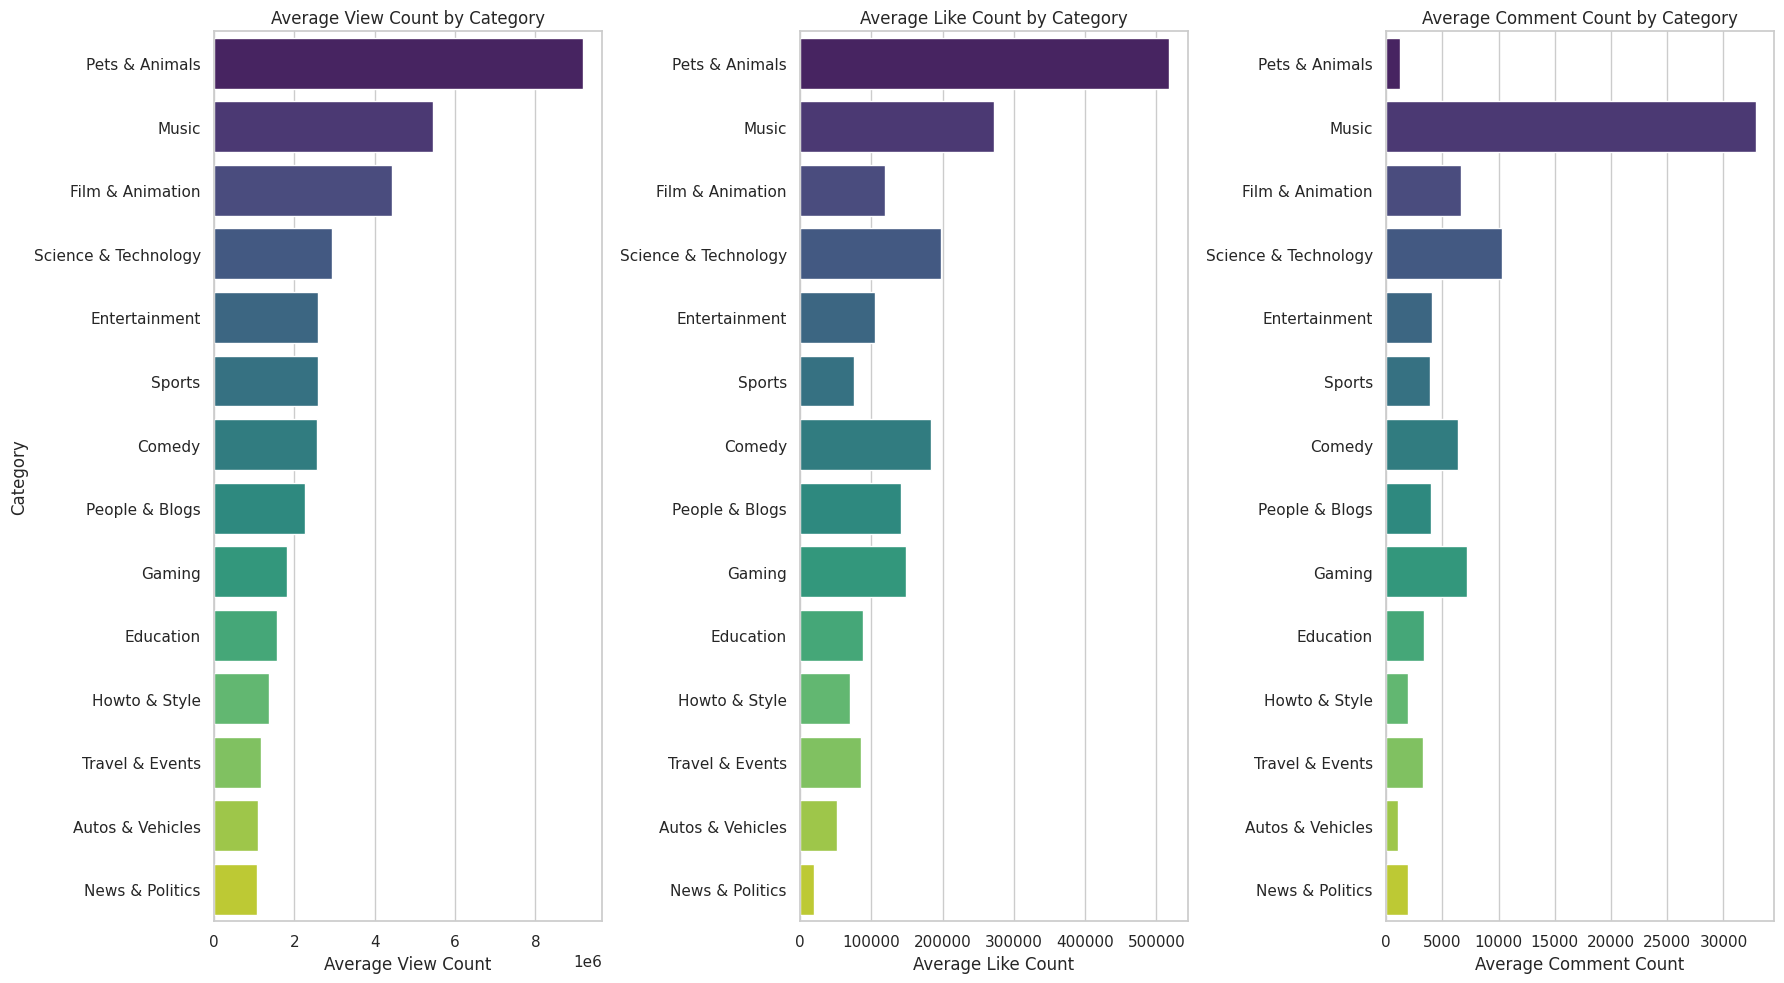

In [35]:
# average engagement metrics by category
df['category_name'] =df['categoryId'].map(category_mapping)
category_engagement = df.groupby('category_name')[['view_count', 'likes', 'comment_count']].mean().sort_values(by='view_count', ascending=False)

fig, axes = plt.subplots(1, 3, figsize=(18, 10))

# view count by category
sns.barplot(y=category_engagement.index, x=category_engagement['view_count'], ax=axes[0], palette='viridis')
axes[0].set_title('Average View Count by Category')
axes[0].set_xlabel('Average View Count')
axes[0].set_ylabel('Category')
# like count by category
sns.barplot(y=category_engagement.index, x=category_engagement['likes'], ax=axes[1], palette='viridis')
axes[1].set_title('Average Like Count by Category')
axes[1].set_xlabel('Average Like Count')
axes[1].set_ylabel('')

# comment count by category
sns.barplot(y=category_engagement.index, x=category_engagement['comment_count'], ax=axes[2], palette='viridis')
axes[2].set_title('Average Comment Count by Category')
axes[2].set_xlabel('Average Comment Count')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

**Music and People & Blogs categories have the highest average view counts, likes, and comments. Film & Animation also shows high engagement, especially in view counts and like counts.**

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251277 entries, 0 to 251276
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   video_id           251277 non-null  object             
 1   title              251277 non-null  object             
 2   publishedAt        251277 non-null  datetime64[ns, UTC]
 3   channelId          251277 non-null  object             
 4   channelTitle       251276 non-null  object             
 5   categoryId         251277 non-null  int64              
 6   trending_date      251277 non-null  object             
 7   tags               251277 non-null  object             
 8   view_count         251277 non-null  int64              
 9   likes              251277 non-null  int64              
 10  dislikes           251277 non-null  int64              
 11  comment_count      251277 non-null  int64              
 12  thumbnail_link     251277 non-

* publishedAt and trending_date relation
* same video trending twice 
* most popalar chanels have trending video ?
* rating and trending relationship
* description has keyboards reason for trending 
* views and tags relation 
* time and date has relation with views or are trending more 

In [37]:
df['trending_date']

0         2020-08-12T00:00:00Z
1         2020-08-12T00:00:00Z
2         2020-08-12T00:00:00Z
3         2020-08-12T00:00:00Z
4         2020-08-12T00:00:00Z
                  ...         
251272    2024-04-15T00:00:00Z
251273    2024-04-15T00:00:00Z
251274    2024-04-15T00:00:00Z
251275    2024-04-15T00:00:00Z
251276    2024-04-15T00:00:00Z
Name: trending_date, Length: 251277, dtype: object

In [38]:
df['trending_date'] = pd.to_datetime(df['trending_date'])

In [39]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [40]:
date_diff = (df['trending_date'] - df['publishedAt']).dt.days
date_diff

0        -1
1         0
2         0
3         1
4         0
         ..
251272    5
251273    2
251274    2
251275    3
251276    2
Length: 251277, dtype: int64

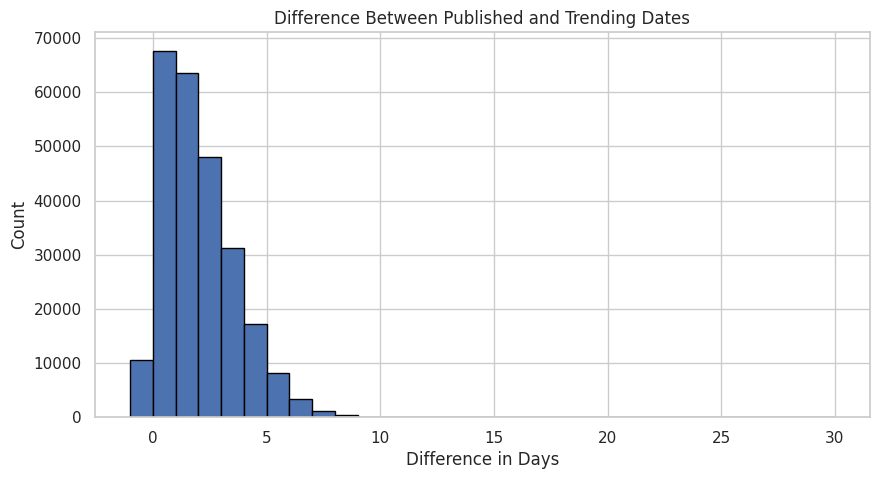

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.hist(date_diff, bins=range(int(date_diff.min()), int(date_diff.max()) + 1), edgecolor='black')
plt.xlabel('Difference in Days')
plt.ylabel('Count')
plt.title('Difference Between Published and Trending Dates')
plt.show()

*The above graph portraiats the number of days in which each of the videos starting trending after being published  **

/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48169 (\N{HANGUL SYLLABLE BANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53444 (\N{HANGUL SYLLABLE TAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/conda/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


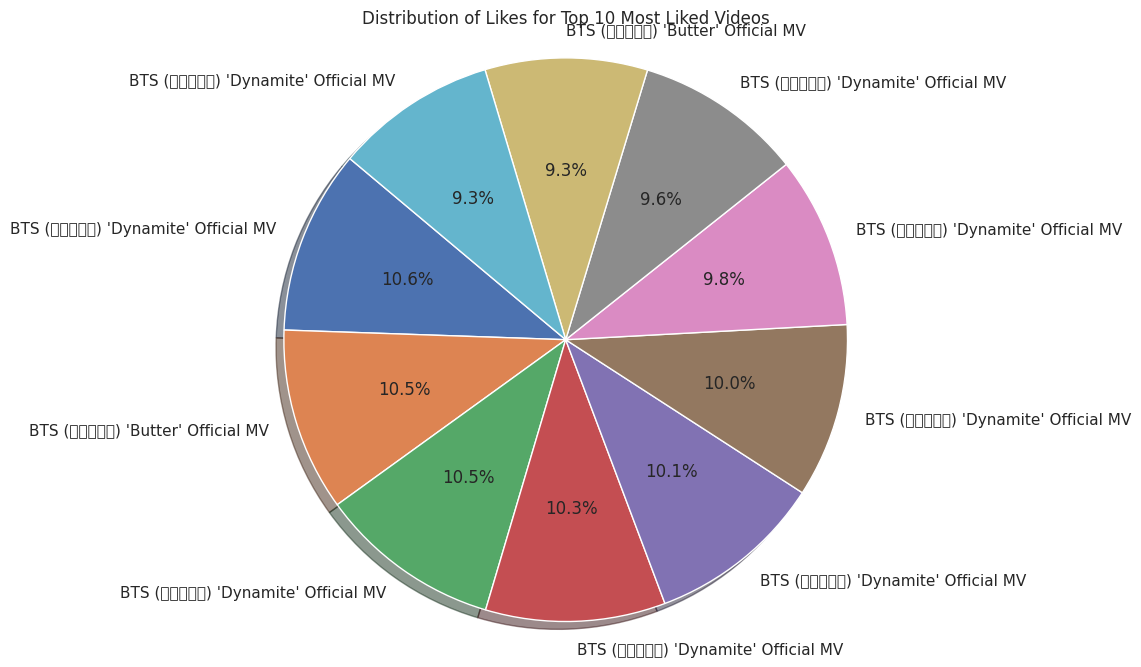

In [42]:

ds_sorted = df.sort_values(by="likes", ascending=False)
most_liked_videos = ds_sorted.iloc[:10]
likes = most_liked_videos["likes"]
titles = most_liked_videos["title"]
explode = [0.1 if i == most_liked_videos["likes"].idxmax() else 0 for i in range(len(likes))]
plt.figure(figsize=(8, 8))
plt.pie(likes, labels=titles, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal') 
plt.title("Distribution of Likes for Top 10 Most Liked Videos")
plt.show()

**Time Series **

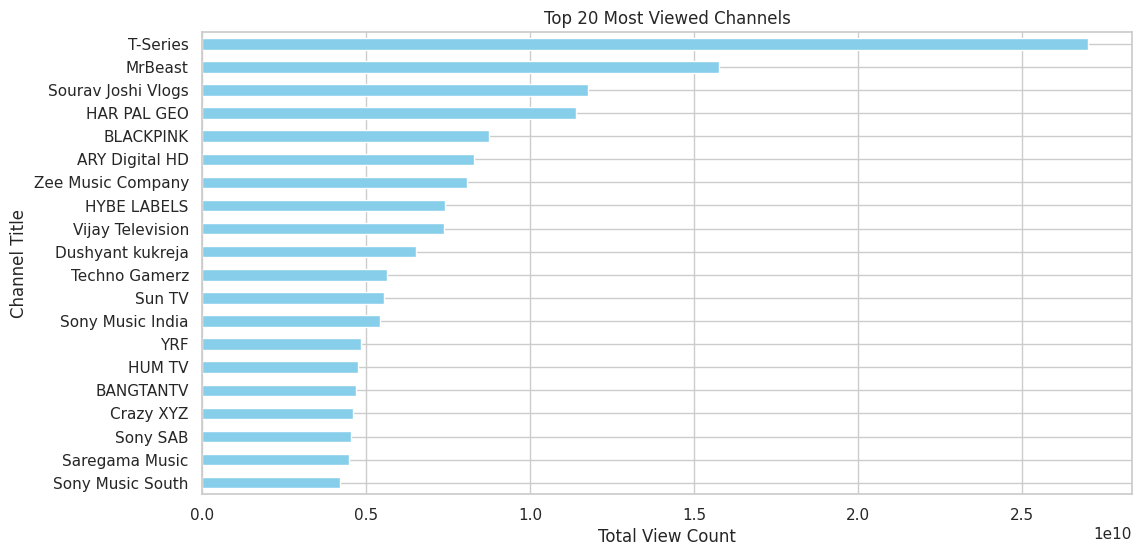

In [43]:
channel_views = df.groupby('channelTitle')['view_count'].sum()
channel_views = channel_views.sort_values(ascending=False)
N = 20  
top_channels = channel_views[:N]
plt.figure(figsize=(12, 6))
top_channels.plot(kind='barh', color='skyblue')
plt.xlabel('Total View Count')
plt.ylabel('Channel Title')
plt.title(f'Top {N} Most Viewed Channels')
plt.gca().invert_yaxis()  
plt.show()

Now, let’s analyze the relationship between views and number of tags used in the video:

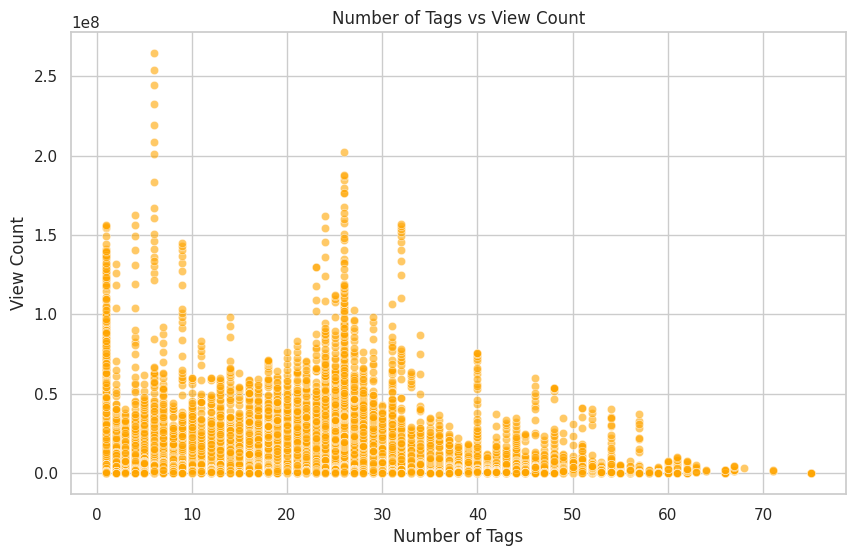

In [44]:
df['tag_count'] = df['tags'].apply(len)

# scatter plot for number of tags vs view count
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tag_count', y='view_count', data=df, alpha=0.6, color='orange')
plt.title('Number of Tags vs View Count')
plt.xlabel('Number of Tags')
plt.ylabel('View Count')
plt.show()

The scatter ploy shows that the number of tags and views are realted to each other , but the num of tags should not exceed 40 

let’s see if there’s an impact of the time a video is posted on its views:

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251277 entries, 0 to 251276
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   video_id           251277 non-null  object             
 1   title              251277 non-null  object             
 2   publishedAt        251277 non-null  datetime64[ns, UTC]
 3   channelId          251277 non-null  object             
 4   channelTitle       251276 non-null  object             
 5   categoryId         251277 non-null  int64              
 6   trending_date      251277 non-null  datetime64[ns, UTC]
 7   tags               251277 non-null  object             
 8   view_count         251277 non-null  int64              
 9   likes              251277 non-null  int64              
 10  dislikes           251277 non-null  int64              
 11  comment_count      251277 non-null  int64              
 12  thumbnail_link     251277 non-

In [46]:
df['video_id']

0         Iot0eF6EoNA
1         x-KbnJ9fvJc
2         KX06ksuS6Xo
3         UsMRgnTcchY
4         WNSEXJJhKTU
             ...     
251272    VKuNHLgrQno
251273    2Dxg3g2MfJg
251274    YDzOPDxinmA
251275    KqtXJCZMhcs
251276    7bKql74_9Pg
Name: video_id, Length: 251277, dtype: object

In [47]:
df['publishedAt']

0        2020-08-12 04:31:41+00:00
1        2020-08-11 09:00:11+00:00
2        2020-08-11 07:30:02+00:00
3        2020-08-10 05:30:49+00:00
4        2020-08-11 05:30:13+00:00
                    ...           
251272   2024-04-09 02:30:22+00:00
251273   2024-04-12 11:31:50+00:00
251274   2024-04-12 07:11:00+00:00
251275   2024-04-11 14:45:01+00:00
251276   2024-04-12 17:27:51+00:00
Name: publishedAt, Length: 251277, dtype: datetime64[ns, UTC]

In [48]:
trending_counts = df['video_id'].value_counts()
repeated_trending_videos = trending_counts[trending_counts > 1]
index_trending_videos = trending_counts[trending_counts > 1].index
print(repeated_trending_videos)

video_id
y_RHQ4mBDKA    19
KVh4KtUSW3A    18
pYDdDIdiSFY    18
LtLJRNBHOKc    17
Hjj9nrjvpZo    17
               ..
zlVilFaWaM4     2
JEZjnGxp9fA     2
vuz9pDg6PP0     2
TfMYiprbLjE     2
AP9ps3CUQds     2
Name: count, Length: 64634, dtype: int64


In [49]:
index_trending_videos

Index(['y_RHQ4mBDKA', 'KVh4KtUSW3A', 'pYDdDIdiSFY', 'LtLJRNBHOKc',
       'Hjj9nrjvpZo', 'nFjVlf2r9_Q', '2OtgYcd83Qg', 'AzOvsmpQVKM',
       'oiBif8SefIg', 'GbwpvjAEZv0',
       ...
       'old2K7rvUzY', 'YeyqZagrHJo', 'qC4HUcL8akI', '_obtZoDunr0',
       'JBDOwN6mcPc', 'zlVilFaWaM4', 'JEZjnGxp9fA', 'vuz9pDg6PP0',
       'TfMYiprbLjE', 'AP9ps3CUQds'],
      dtype='object', name='video_id', length=64634)

In [50]:
df.columns = df.columns.str.strip()

The video that were trending more than 10 times 

In [51]:
repeated_trending_videos = trending_counts[trending_counts > 10].index

# Filter the original DataFrame to get details of these videos
repeated_videos_df = df[df['video_id'].isin(repeated_trending_videos)]

# Print the filtered DataFrame to check the results
unique_videos_df = repeated_videos_df.drop_duplicates(subset='video_id')
for idx, row in unique_videos_df.iterrows():
    print(f"Channel: {row['channelTitle']}, Video Title: {row['title']}")

Channel: FoxStarHindi, Video Title: Sadak 2 | Official Trailer | Sanjay | Pooja | Alia | Aditya | Jisshu | Mahesh Bhatt | 28 Aug
Channel: Hombale Films, Video Title: KGF Chapter2 TEASER |Yash|Sanjay Dutt|Raveena Tandon|Srinidhi Shetty|Prashanth Neel|Vijay Kiragandur
Channel: ashish chanchlani vines, Video Title: Online Parent Teacher Meeting | Ashish Chanchlani
Channel: Amit Bhadana, Video Title: Rakh Hausla | Amit Bhadana | Short Film
Channel: Flying Beast, Video Title: Had to Rush her to the Hospital
Channel: Sony PAL, Video Title: Taarak Mehta Ka Ooltah Chashmah | तारक मेहता का उल्टा चश्मा | Episode 2638 | 29th  May, 2021
Channel: Make Joke Of, Video Title: MAKE JOKE OF ||MJO|| - MANOJ MISTARI
Channel: imkavy, Video Title: Aise kon Chori karta hai🙄 #imkavy #Shorts
Channel: Kokku Entertainment, Video Title: Othalanga Thuruthu | Episode 9  | പാണ്ടി പൂട്ട് I Web Series
Channel: Suyash Vlogs, Video Title: She thought she pranked me 😂🤷‍♂️ #shorts
Channel: Ranjit Bawa, Video Title: Fikar 

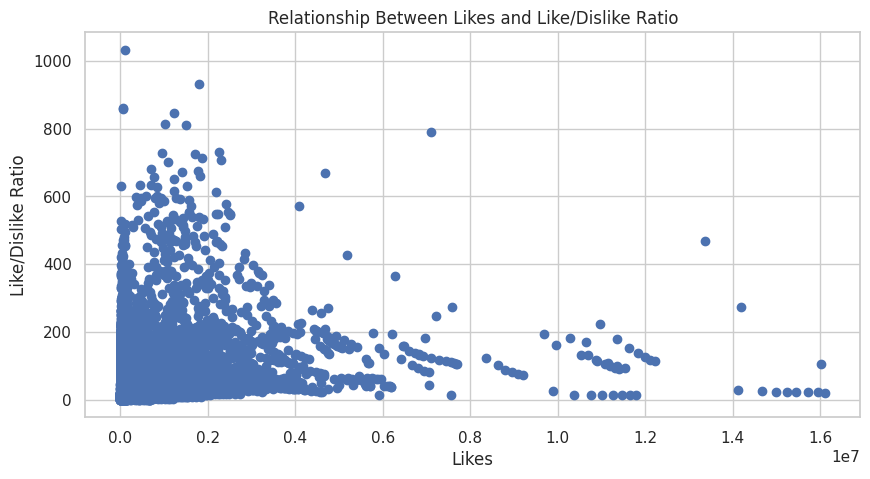

In [52]:

# Calculate the like/dislike ratio
df['like_dislike_ratio'] = df['likes'] / df['dislikes']

# Plotting
plt.figure(figsize=(10, 5))
plt.scatter(df['likes'], df['like_dislike_ratio'])
plt.xlabel('Likes')
plt.ylabel('Like/Dislike Ratio')
plt.title('Relationship Between Likes and Like/Dislike Ratio')
plt.show()

Conclusion
So, here’s my conclusion on what makes a video trend on YouTube:

Encourage viewers to like and comment on videos to boost engagement metrics.
Schedule video uploads around peak times (2 PM – 8 PM) to maximize initial views and engagement.